# Исследование объявлений о продаже квартир

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [9]:
import pandas as pd

In [15]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    df = pd.read_csv("real_estate_data.csv", sep = '\t')

In [16]:
df.isna().sum() # оценим пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [3]:
df.info() # получим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В DF 22 столбца, 23.699 строк. При выгрузке csv файла в Data Frame данные склеились в одну строку. Разделила их, применив "\t". 

Обнаружены пропуски в столбцах: 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'days_exposition'. 

## Предобработка данных

1. Строки, где в Названии населенного пункта (locality_name) пропуски, удалила, т.к их мало и они не будут влиять на результат в дальнейшем. С целью единообразия, заменим 'посёлок' на 'поселок'. 

In [4]:
df = df.dropna(subset = ['locality_name']) #заменим пропущеные названия нас пункта предыдущ значениями
df['locality_name'] = df['locality_name'].str.replace('посёлок ', 'поселок ') # заменили полёлок на поселок

2.  Удалим строки, где количество этажей (floors_total) не указано. Заменим тип данных float(вещественные) на int (целые). Количество этажей это целое число. 

In [5]:
display(df[df['floors_total'].isnull()]) # проверка есть ли среди пропусков floor выше 1 этажа

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [6]:
df = df.dropna(subset = ['floors_total'])

In [7]:
df['floors_total'] = df['floors_total'].astype('int')

3. При заполнении пропусков в столбце 'kitchen_area' сгруппировала по общей площади, взяла медиану.

In [8]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby(['total_area'])['kitchen_area'].transform('median'))

4. Высоту потолков (ceiling_height) земеню медианным значением. Группировка по количеству этажей.  

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floors_total')['ceiling_height'].transform('median'))

5. Жилая площать (living_area) заменяется медианным значением, с группировкой по общей площади квартиры (total_area).

In [10]:
df['living_area'] = df['living_area'].fillna(df.groupby(['total_area'])['living_area'].transform('median'))

6. Если балконы не указаны, будем считать, что их нет, заменим на 0. Заменим тип данных float(вещественные) на int (целые). Количество балконов же всегда в вице целых чисел!) 

In [11]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')

7. Если не указано апартаменты или нет, значит вернем False.

In [12]:
df['is_apartment'] = df['is_apartment'].astype('bool')
df['is_apartment'] = df['is_apartment'].fillna(False)

8. Если не указано расстояние до ближайшего аэропорта (достаточно общий параметр), то заполняем медианным значением, сгруппированным по названию населенного пункта (locality_name).

In [13]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df.groupby('locality_name')['cityCenters_nearest'].transform('median'))

In [14]:
df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby('locality_name')['airports_nearest'].transform('median'))

In [15]:
df = df.dropna(subset = ['cityCenters_nearest'])

In [16]:
df = df.dropna(subset = ['airports_nearest'])

9. Расстояние до центра города (cityCenters_nearest) достаточно частный параметр, какие либо приближений, могут внессти достаточно сильные изменения, оставим его без изменений. Аналогично поступим с параметрами расстояние до ближайшего парка (parks_nearest), расстояние до ближайшего водоёма (ponds_nearest). Для проекта и выводов это не важные параметры.  
   Если число парков в радиусе 3 км (parks_around3000) и число водоёмов в радиусе 3 км (ponds_around3000) не указано, значит их нет, заменим на 0.  Изменим тип данных этих характеристик на целое (int).
10. Пропуск в количестве дней было размещено объявление (days_exposition) предположительно вызван тем, что объявление еще актуально. Не будем вносить изменения. 

In [17]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

In [18]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].astype('int')

Проверим: 

In [19]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area                98
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              114
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest           10103
ponds_around3000            0
ponds_nearest            9097
days_exposition          2344
dtype: int64

In [20]:
df = df.dropna(subset = ['living_area'])

In [21]:
df = df.dropna(subset = ['kitchen_area'])

In [22]:
df.isnull().sum() # проверка

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest           10002
ponds_around3000            0
ponds_nearest            9036
days_exposition          2324
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17956 entries, 0 to 23694
Data columns (total 22 columns):
total_images            17956 non-null int64
last_price              17956 non-null float64
total_area              17956 non-null float64
first_day_exposition    17956 non-null object
rooms                   17956 non-null int64
ceiling_height          17955 non-null float64
floors_total            17956 non-null int64
living_area             17956 non-null float64
floor                   17956 non-null int64
is_apartment            17956 non-null bool
studio                  17956 non-null bool
open_plan               17956 non-null bool
kitchen_area            17956 non-null float64
balcony                 17956 non-null int64
locality_name           17956 non-null object
airports_nearest        17956 non-null float64
cityCenters_nearest     17956 non-null float64
parks_around3000        17956 non-null int64
parks_nearest           7954 non-null float64
ponds_around3000      

Вывод по разделу Предобработка данных: 
1. Избавилась от пропусков данных, где это возможно осуществив замену. В важных параметрах, которые в дальнейшем будут иметь значения в расчетах, избавилась от оставшихся пропусков, удалив их. 
2. Привела в соответствие типы данных. 
3. Данные готовы, можно приступать к расчетам. 

## Расчёты и добавление результатов в таблицу

1. Рассчитаем цену квадратного метра. Введем столбец: цена квадратного метра (price_for_m2). Получим значения с столбце путем деления цены на момент снятия с публикации на общую площадь квартиры в квадратных метрах. 

In [24]:
df['price_for_m2'] = df['last_price']/df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11,18.6,1,True,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14,95.0,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000


2. Расчитаем: день недели, месяц и год публикации объявления. Для этого: столбец 'first_day_exposition' переводим в формат даты, окгугляем до дня. Сздадим столбцы с номерами дня недели (number_day), месяцем (number_months), годом (number_year) публикации.
 

In [25]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M:%S') #перевожу в формат даты
df['first_day_exposition']=df['first_day_exposition'].dt.round('1d') # округляю до дня

In [26]:
df['number_day'] = df['first_day_exposition'].dt.weekday #создаю столбец с днем недели
df['number_months'] = df['first_day_exposition'].dt.month 
df['number_year'] = df['first_day_exposition'].dt.year 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,number_day,number_months,number_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,True,...,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,True,...,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,95.0,9,True,...,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018


3. Введем столбец, в котором будет отображаться вприант расположения этажа квартиры - варианты: Первый этаж, Последний, Другой. 

In [27]:
def floor_group(row): # функция категоризации этажей
    real_floor = row['floor']
    total_floor = row['floors_total']
    if real_floor == 1:
        return 'Первый'
    if real_floor == total_floor:
        return 'Последний'
    return 'Другой'

In [28]:
df['group_floor'] = df.apply(floor_group, axis = 1)

In [29]:
df.head() # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,number_day,number_months,number_year,group_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,Другой
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,True,...,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,Первый
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,True,...,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,Другой
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,95.0,9,True,...,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,Другой


4. Ведем столбцы 'area_ratio', 'kitchen_ratio', в которых будут фигурировать соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [30]:
df['living_ratio'] = df['living_area']/df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,number_day,number_months,number_year,group_floor,living_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,Другой,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,True,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,Первый,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,True,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,95.0,9,True,...,84.0,3,234.0,424.0,408176.100629,4,7,2015,Другой,0.597484
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000


In [31]:
df['kitchen_ratio'] = df['kitchen_area']/df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,number_day,number_months,number_year,group_floor,living_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,2,755.0,NaN,120370.370370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,True,...,0,NaN,81.0,82920.792079,1,12,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,True,...,2,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,95.0,9,True,...,3,234.0,424.0,408176.100629,4,7,2015,Другой,0.597484,0.094340
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,1,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000


## Исследовательский анализ данных

In [32]:
import matplotlib.pyplot as plt # добавим библиотеку для постороения графиков

1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Постоим гистограммы для каждого параметра.

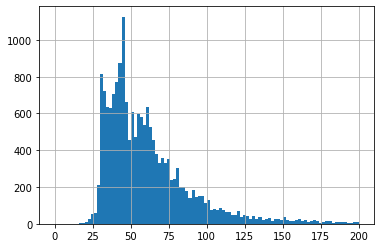

In [33]:
df['total_area'].hist(bins = 100, range =(0, 200))

In [34]:
df['total_area'].describe()

count    17956.000000
mean        63.093418
std         37.443452
min         14.000000
25%         41.300000
50%         54.000000
75%         73.000000
max        900.000000
Name: total_area, dtype: float64

Из гистограммы видно, что больше всего квартир продается площадью 40-45 кв. м. 

In [35]:
df['last_price'] = df['last_price'] / 1000000 # цену перевели в млн
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,number_day,number_months,number_year,group_floor,living_ratio,kitchen_ratio
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,2,755.0,NaN,120370.370370,3,3,2019,Другой,0.472222,0.231481
1,7,3.350,40.4,2018-12-04,1,2.75,11,18.6,1,True,...,0,NaN,81.0,82920.792079,1,12,2018,Первый,0.460396,0.272277
2,10,5.196,56.0,2015-08-20,2,2.55,5,34.3,4,True,...,2,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.148214
3,0,64.900,159.0,2015-07-24,3,2.60,14,95.0,9,True,...,3,234.0,424.0,408176.100629,4,7,2015,Другой,0.597484,0.094340
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,1,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000


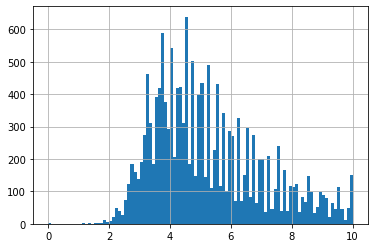

In [36]:
df['last_price'].hist(bins = 100, range =(0, 10))

In [37]:
df['last_price'].describe()

count    17956.000000
mean         7.521175
std         11.898269
min          0.012190
25%          4.000000
50%          5.250000
75%          7.650000
max        763.000000
Name: last_price, dtype: float64

Из гистограммы видно, что больше всего квартир продается по цене 3-5 млн. 

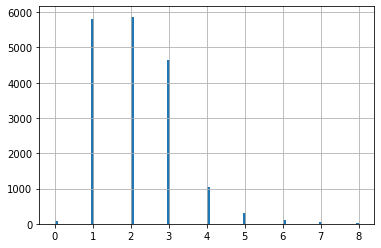

In [38]:
df['rooms'].hist(bins = 100, range = (0, 8))

Больше всего продается 1-2 комнатных квартир. 

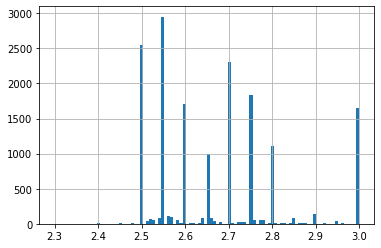

In [39]:
df['ceiling_height'].hist(bins = 100, range =(2.3, 3.0))

In [40]:
df['ceiling_height'].describe() # изучим детально выборку

count    17955.000000
mean         2.749329
std          0.998635
min          1.000000
25%          2.550000
50%          2.690000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Среднее значение высоты потолков - 2,74. 

2. Изучим время продажи квартиры: 

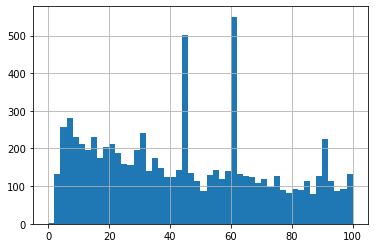

In [41]:
df['days_exposition'].hist(bins = 50, range = (0, 100))

Больше всего продаж квартир приходится на 46 день. 

In [42]:
df['days_exposition'].describe() # характеристики, дающие представление о выборке 

count    15632.000000
mean       182.604593
std        223.428138
min          1.000000
25%         43.000000
50%         96.000000
75%        232.000000
max       1572.000000
Name: days_exposition, dtype: float64

Постоим диаграмму размаха для столбца days_exposition. 

(0, 1700)

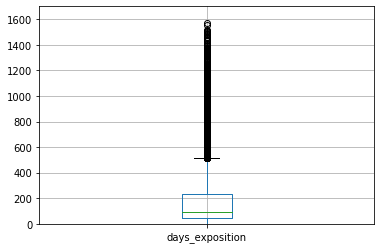

In [43]:
df.boxplot(column='days_exposition')
plt.ylim(0, 1700)  # диаграмма размаха с выбросами


Исследуя диаграмму размаха можно сделать вывод, что медианное время продажи квартиры 95 дней. Минимальное значение - 1 день, максимальное - 1580 дней. Такое описание не точно, сюда входят выбросы. Чтобы учесть влияние выбросов посчитаем межквартильный размах. В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками.Оценим значение выбросов: к значению третьего квартиля прибавим 1,5 Q, что получается равно 512. Выше этого значения расположены выбросы.   

Уберем выбросы, находящиеся за 1.5 межквартальным интервалом, добавленного к Q3, для этого:

In [44]:
days_exposition = df.query('days_exposition < 512')

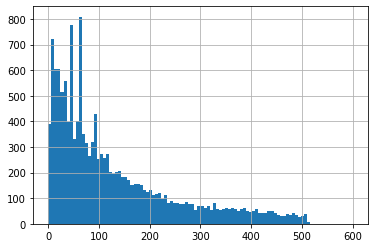

In [45]:
days_exposition['days_exposition'].hist(bins = 100, range = (0, 600))

Убрали выбросы, находящиеся за 1.5 межквартальным интервалом + Q3. Наблюдается 2 пика: 45 и 60 дней. Это видно на графике:

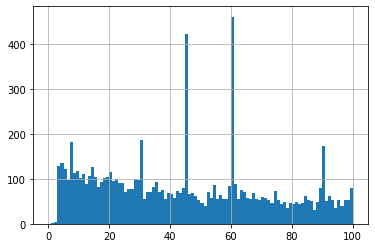

In [46]:
days_exposition['days_exposition'].hist(bins = 100, range = (0, 100))

Что подтверждает полученные ранее выводы о максимальном количестве продаж квартир на 45-46 день. 

3. Далее рассмотрим стоимость квартир: 

In [47]:
days_exposition['last_price'].describe()

count    14327.000000
mean         6.938008
std         11.802279
min          0.012190
25%          3.900000
50%          5.000000
75%          7.020000
max        763.000000
Name: last_price, dtype: float64

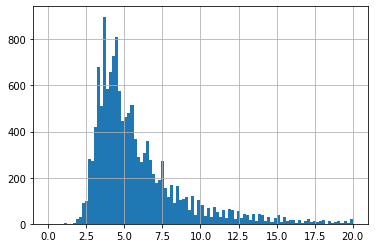

In [48]:
days_exposition['last_price'].hist(bins = 100, range = (0, 20))

(0, 15)

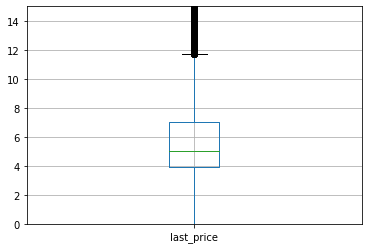

In [49]:
days_exposition.boxplot(column='last_price')
plt.ylim(0,15)

Из диаграммы размаха видно, что в выбросы попадают квартиры стоимостью выше 11 млн. 

In [50]:
display(days_exposition.sort_values(by = 'last_price', ascending = False).head(10)) # подтверждаем график, отсортировав по убыванию значений столбца
display(days_exposition.sort_values(by = 'last_price', ascending = False).tail(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,number_day,number_months,number_year,group_floor,living_ratio,kitchen_ratio
12971,19,763.000,400.0,2017-09-30,7,2.60,10,250.0,10,True,...,3,756.0,33.0,1.907500e+06,5,9,2017,Последний,0.625000,0.125000
19540,8,420.000,900.0,2017-12-06,12,2.80,25,409.7,25,True,...,2,318.0,106.0,4.666667e+05,2,12,2017,Последний,0.455222,0.124444
14706,15,401.300,401.0,2016-02-20,5,2.55,9,204.0,9,False,...,1,478.0,393.0,1.000748e+06,5,2,2016,Последний,0.508728,0.059850
1436,19,330.000,190.0,2018-04-04,3,3.50,7,95.0,5,True,...,3,285.0,233.0,1.736842e+06,2,4,2018,Другой,0.500000,0.210526
15651,20,300.000,618.0,2017-12-18,7,3.40,7,258.0,5,True,...,2,198.0,111.0,4.854369e+05,0,12,2017,Другой,0.417476,0.113269
16461,17,245.000,285.7,2017-04-10,6,3.35,7,182.8,4,True,...,3,140.0,249.0,8.575429e+05,0,4,2017,Другой,0.639832,0.104305
13749,7,240.000,410.0,2017-04-01,6,3.40,7,218.0,7,True,...,2,198.0,199.0,5.853659e+05,5,4,2017,Последний,0.531707,0.097561
19155,20,160.000,243.0,2018-11-12,5,2.55,5,145.0,4,True,...,1,200.0,18.0,6.584362e+05,0,11,2018,Другой,0.596708,0.135802
2536,16,159.984,242.4,2015-08-27,4,3.85,9,131.0,7,True,...,1,227.0,501.0,6.600000e+05,3,8,2015,Другой,0.540429,0.082508
16495,12,159.000,260.0,2017-04-04,4,2.55,5,180.0,4,True,...,3,620.0,178.0,6.115385e+05,1,4,2017,Другой,0.692308,0.115385


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,number_day,number_months,number_year,group_floor,living_ratio,kitchen_ratio
17753,12,1.80000,117.3,2016-02-18,5,3.00,4,23.6,2,False,...,0,NaN,139.0,15345.268542,3,2,2016,Другой,0.201194,0.109974
14428,7,1.79900,37.9,2018-02-01,1,2.70,3,20.3,2,True,...,0,NaN,135.0,47467.018470,3,2,2018,Другой,0.535620,0.145119
8593,1,1.78000,37.0,2018-01-12,1,2.66,26,17.0,4,True,...,0,NaN,45.0,48108.108108,4,1,2018,Другой,0.459459,0.270270
20123,7,1.65000,32.2,2017-05-22,1,2.60,9,17.8,8,False,...,2,433.0,58.0,51242.236025,0,5,2017,Другой,0.552795,0.192547
23394,10,1.60000,92.0,2018-07-10,3,3.00,6,13.0,1,True,...,3,167.0,3.0,17391.304348,1,7,2018,Первый,0.141304,0.108696
716,5,1.50000,17.0,2017-06-07,0,2.70,9,12.0,1,True,...,0,NaN,40.0,88235.294118,2,6,2017,Первый,0.705882,0.176471
14064,8,1.40000,24.0,2017-05-24,0,2.75,25,14.0,1,True,...,0,NaN,60.0,58333.333333,2,5,2017,Первый,0.583333,0.229167
4248,8,1.20000,49.1,2018-10-21,4,2.50,5,36.9,1,True,...,0,NaN,44.0,24439.918534,6,10,2018,Первый,0.751527,0.105906
19642,5,1.19000,14.0,2018-07-29,1,2.55,5,11.0,1,True,...,0,NaN,4.0,85000.000000,6,7,2018,Первый,0.785714,0.142857
8793,7,0.01219,109.0,2019-03-20,2,2.75,25,32.0,25,True,...,0,NaN,8.0,111.834862,2,3,2019,Последний,0.293578,0.371560


Квартиры большой стоимости есть, но их единицы. Кроме того, есть квартиры стоимостью менее 1 млн. Уберем из таблицы строки, в которых цены на квартиры менее 1 млн и более 11 млн.


In [51]:
flat_without_outlier = days_exposition.query('last_price > 1.0 and last_price < 11.0')

Исследуем зависимость цены от общей площади. Построим график:

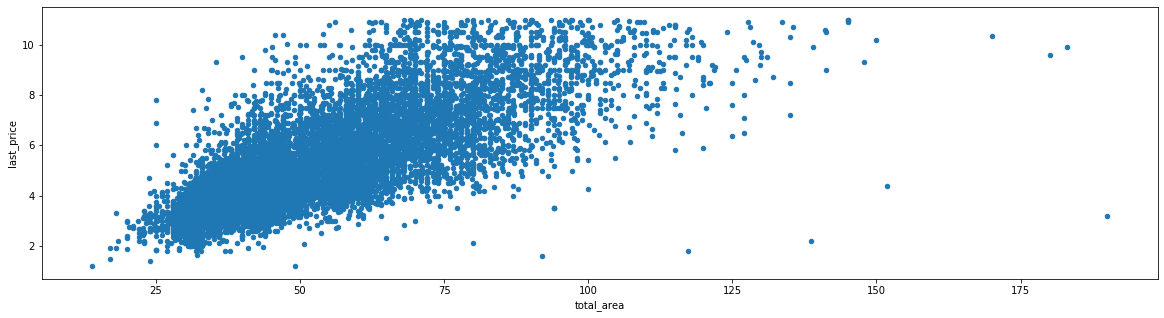

In [52]:
(flat_without_outlier
 #.pivot_table(index = 'total_area', values = 'last_price')
 .plot(kind = 'scatter', x = 'total_area', y = 'last_price', figsize=(20,5))
 ) 

При увеличении площади квартиры, ростет и цена. 

Оценим коэффициент корреляции (зависимость между стоимостью жилья и общей площадью):

In [53]:
flat_without_outlier['last_price'].corr(days_exposition['total_area'])

0.7697689065582214

При увеличении общей площади увеличивается стоимость, это подтверждается коэффициентом корреляции Пирсона, который  положительный и равен 0,68. Такой коэффициент корреляции гооврит о том, что связь между ростом цены и увеличением площади, слабая. 

Далее изучим зависимость цены от числа комнат:

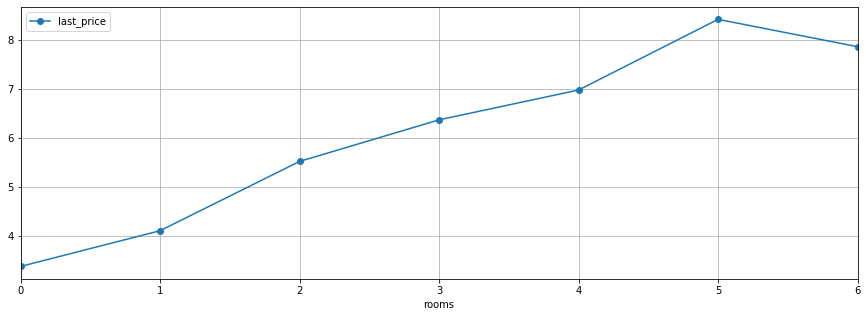

In [54]:
(flat_without_outlier
 .pivot_table(index = 'rooms', values = 'last_price')
 .plot(grid=True, style='o-', figsize=(15,5))
 ) 

Цена ростет при увеличении количества комнат, однако при большом количестве, начинает снижаться, предположительно, мало данных. 

In [55]:
flat_without_outlier['last_price'].corr(days_exposition['rooms'])

0.5126901122447829

Коэффициент корреляции Пирсона положительный, при увеличении количества комнат, незначительно ростет цена. Такой коэффициент корреляции говорит о том, что связь между ростом цены и количеством комнат, слабая.  

Выясним как удаленность от центра влияет на цену: 

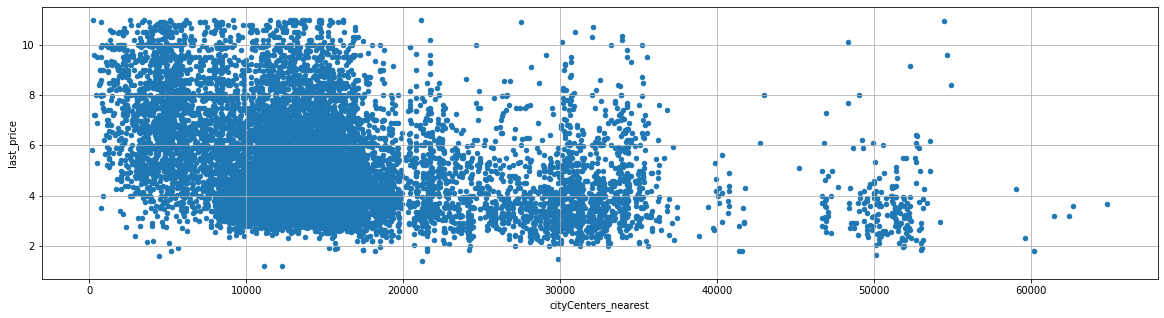

In [56]:
(flat_without_outlier
     #.pivot_table(index = 'cityCenters_nearest', values = 'last_price')
     .plot(x = 'cityCenters_nearest', y = 'last_price', grid=True, style='o-', figsize = (20,5), kind='scatter')
)

In [57]:
flat_without_outlier['last_price'].corr(days_exposition['cityCenters_nearest'])

-0.33908010674629263

На графике можно увидеть, что при отдалении от центра цена уменьшается, это показывает и коэффициент Пирсона (отрицательный). При росте одной величины, вторая уменьшается. Однако малый коэффициент корреляции говорит о том, что зависимость слабая. 

Изучим зависимость цены от этажа расположения:

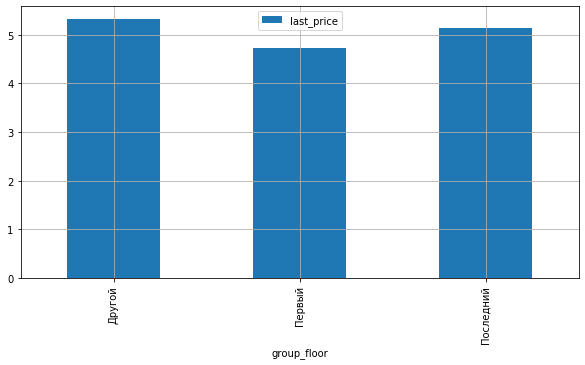

In [58]:
(flat_without_outlier
     .pivot_table(index = 'group_floor', values = 'last_price')
     .plot(grid=True, style='o-', figsize=(10,5), kind='bar')
)

In [59]:
flat_without_outlier['last_price'].corr(days_exposition['floor'])

0.06996697800466876

Цена не сильно меняется от этажа, но все же, первый и последний этаж ценятся менее. Коэффициент корреляции, говорит о очень низкой зависимости между этажом и ценой. 

Изучим зависимость от даты размещения: 

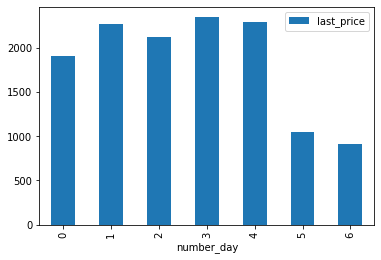

In [60]:
(flat_without_outlier
     .pivot_table(index = 'number_day', values = 'last_price', aggfunc = ('count'))
     .plot(kind = 'bar')
)

Из графика видно, что в выходные меньше всего размещается объявлений. 

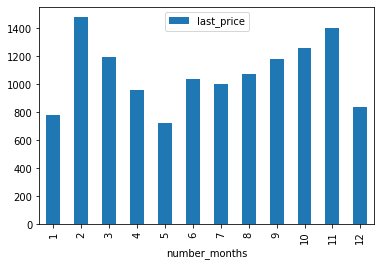

In [61]:
(flat_without_outlier
     .pivot_table(index = 'number_months', values = 'last_price', aggfunc = ('count'))
     .plot(kind = 'bar')
)

В декабре, январе и мае меньше всего объявлений, видимо сказваются праздники. 

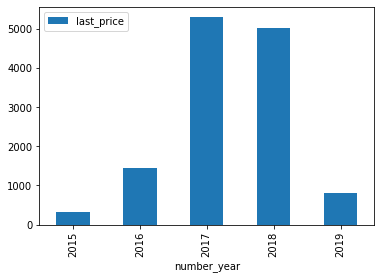

In [62]:
(flat_without_outlier
     .pivot_table(index = 'number_year', values = 'last_price', aggfunc = ('count'))
     .plot(kind = 'bar')
)

По годам динамика показывала рост, но в 2019 вернулись к продажам 2016. 

Выберем 10 населённых пунктов с наибольшим числом объявлений.

In [63]:
flat_without_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12925 entries, 1 to 23693
Data columns (total 29 columns):
total_images            12925 non-null int64
last_price              12925 non-null float64
total_area              12925 non-null float64
first_day_exposition    12925 non-null datetime64[ns]
rooms                   12925 non-null int64
ceiling_height          12924 non-null float64
floors_total            12925 non-null int64
living_area             12925 non-null float64
floor                   12925 non-null int64
is_apartment            12925 non-null bool
studio                  12925 non-null bool
open_plan               12925 non-null bool
kitchen_area            12925 non-null float64
balcony                 12925 non-null int64
locality_name           12925 non-null object
airports_nearest        12925 non-null float64
cityCenters_nearest     12925 non-null float64
parks_around3000        12925 non-null int64
parks_nearest           5261 non-null float64
ponds_around30

In [64]:
top_location =  flat_without_outlier.pivot_table(index = 'locality_name', values = 'price_for_m2', aggfunc = ('median', 'count'))

In [65]:
top_location.sort_values(by = 'count', ascending = False).head(10)
#top_location.sort_values(by = 'count', ascending = False).tail(10)

,count,median
locality_name,,
Санкт-Петербург,10920,100571.447231
поселок Шушары,387,75949.367089
Колпино,291,73378.839590
поселок Парголово,287,91250.000000
Пушкин,258,97306.366769
Петергоф,155,81818.181818
Красное Село,144,72354.423292
Сестрорецк,138,97008.928571
Ломоносов,96,70489.583333


Выбрали 10 населенных пунктов с наибольшим числом объявлений, вычислили среднюю цену квадратного метра в условных единицах. 
В Санкт-Петербург больше всего объявлений и самая высокая цена квадратного метра. На 10 месте по количеству объявлений Выборг, со средней стоимостью жилья за квадратный метр 57% от стоимости в Санкт-Петербурге.   

In [66]:
top_location.sort_values(by = 'median', ascending = False).head(10)

,count,median
locality_name,,
поселок Лисий Нос,2,113728.348730
Санкт-Петербург,10920,100571.447231
Зеленогорск,20,98596.112311
Пушкин,258,97306.366769
Сестрорецк,138,97008.928571
поселок Левашово,1,96997.690531
поселок Репино,1,92727.272727
поселок Парголово,287,91250.000000
поселок Стрельна,33,86666.666667


In [67]:
top_location.sort_values(by = 'median', ascending = True).head(10)

,count,median
locality_name,,
поселок Сапёрный,4,63314.899066
поселок Александровская,1,63559.322034
поселок Понтонный,17,65625.000000
поселок Усть-Ижора,2,65935.672515
поселок Белоостров,1,66666.666667
поселок Молодёжное,1,67843.866171
Ломоносов,96,70489.583333
Красное Село,144,72354.423292
поселок Петро-Славянка,1,73333.333333


Создадим столбец в котором будет записано удаленность от центра в км.:

In [68]:
flat_without_outlier['cityCenters_nearest_in_km'] = flat_without_outlier['cityCenters_nearest']/1000

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
flat_without_outlier['cityCenters_nearest'] = flat_without_outlier['cityCenters_nearest'].astype('int') #привела к целому типу

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
flat_without_outlier['cityCenters_nearest_in_km'] = flat_without_outlier['cityCenters_nearest_in_km'].astype('int') #привела к целому типу

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
display( flat_without_outlier.head()) # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_m2,number_day,number_months,number_year,group_floor,living_ratio,kitchen_ratio,cityCenters_nearest_in_km
1,7,3.35,40.4,2018-12-04,1,2.75,11,18.6,1,True,...,NaN,81.0,82920.792079,1,12,2018,Первый,0.460396,0.272277,18
4,2,10.00,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000,8
6,6,3.70,37.3,2017-11-02,1,2.66,26,10.6,6,True,...,NaN,155.0,99195.710456,3,11,2017,Другой,0.284182,0.386059,19
9,18,5.40,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,NaN,289.0,88524.590164,6,2,2017,Другой,0.714754,0.106557,15
10,5,5.05,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,553.0,137.0,127525.252525,3,11,2017,Другой,0.512626,0.214646,13


Посчитаем стоимость для всех объектов от удаленности от центра, т.е цена за км. от центра:

In [72]:
flat_without_outlier_price_m2_on_km = flat_without_outlier.pivot_table(index = 'cityCenters_nearest_in_km', values = 'price_for_m2', aggfunc = 'mean')

In [73]:
display(flat_without_outlier_price_m2_on_km.head()) # проверка

,price_for_m2
cityCenters_nearest_in_km,
0,112891.916994
1,110670.857646
2,111789.669198
3,108273.405632
4,117008.837550


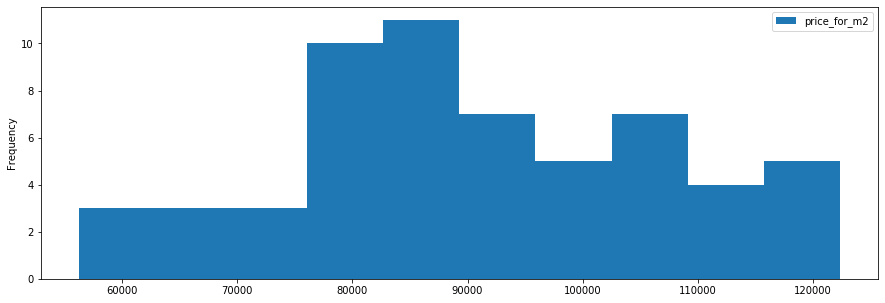

In [74]:
flat_without_outlier_price_m2_on_km.plot(kind = 'hist', figsize=(15,5))

Расчитала среднюю стоимость метра квадратного в зависимости от расстояния от центра. Результат отобразила в сводной таблице. Кроме того, постоила гистограмму распределение стоимости квадратного метра от расстояния. 

Выделим квартиры в Санкт-Петербурге: 

In [75]:
spb_region = flat_without_outlier.query('locality_name == "Санкт-Петербург"')
display(spb_region.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_m2,number_day,number_months,number_year,group_floor,living_ratio,kitchen_ratio,cityCenters_nearest_in_km
4,2,10.00,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000,8
9,18,5.40,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,NaN,289.0,88524.590164,6,2,2017,Другой,0.714754,0.106557,15
10,5,5.05,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,553.0,137.0,127525.252525,3,11,2017,Другой,0.512626,0.214646,13
15,16,4.65,39.0,2017-11-18,1,2.60,14,20.5,5,True,...,296.0,19.0,119230.769231,5,11,2017,Другой,0.525641,0.194872,14
16,11,6.70,82.0,2017-11-23,3,3.05,5,55.6,1,True,...,NaN,397.0,81707.317073,3,11,2017,Первый,0.678049,0.109756,10


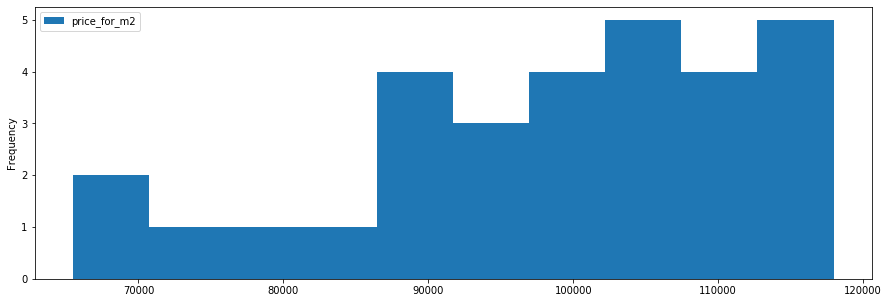

In [76]:
(spb_region
     .pivot_table(index = 'cityCenters_nearest_in_km', values = 'price_for_m2', aggfunc = 'mean')
     .plot(kind = 'hist', figsize=(15,5))
)

Получили распределение средней цены за квадратный метр в зависимости от расстояния. 

Выделим квартиры в центре Санкт-Петербурга:

In [77]:
spb_centr_region = spb_region.query('cityCenters_nearest_in_km < 5')


In [78]:
len(spb_centr_region) # количество квартир в центре С-П

899

Выведем самые дорогие квартиры в СПБ: 

In [79]:
spb_centr_region.sort_values(by = 'last_price', ascending = False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_m2,number_day,number_months,number_year,group_floor,living_ratio,kitchen_ratio,cityCenters_nearest_in_km
3280,14,10.999,89.0,2019-03-22,3,3.68,5,29.0,1,True,...,218.0,32.0,123584.269663,4,3,2019,Первый,0.325843,0.393258,2
8614,7,10.990,100.0,2015-12-16,3,3.90,5,37.8,3,True,...,511.0,265.0,109900.000000,2,12,2015,Другой,0.378000,0.116000,0
4928,1,10.990,145.0,2017-09-25,5,2.55,5,98.0,1,True,...,323.0,82.0,75793.103448,0,9,2017,Первый,0.675862,0.124138,3
8145,20,10.900,56.0,2018-02-26,1,3.00,8,24.0,3,True,...,383.0,133.0,194642.857143,0,2,2018,Другой,0.428571,0.357143,3
12252,8,10.900,109.7,2016-03-24,4,3.17,6,71.9,3,False,...,346.0,320.0,99361.896080,3,3,2016,Другой,0.655424,0.113947,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6544,4,2.740,20.3,2018-12-18,1,3.00,6,16.0,1,True,...,1018.0,29.0,134975.369458,1,12,2018,Первый,0.788177,0.197044,4
17860,1,2.385,20.0,2018-12-11,1,3.00,6,15.0,2,True,...,1002.0,25.0,119250.000000,1,12,2018,Другой,0.750000,0.280000,2
19952,7,2.200,138.7,2016-06-24,4,3.00,7,90.7,5,False,...,653.0,203.0,15861.571738,4,6,2016,Другой,0.653929,0.098774,4
4930,6,2.176,23.0,2017-12-08,0,2.90,4,19.0,1,False,...,214.0,7.0,94608.695652,4,12,2017,Первый,0.826087,0.217391,3


Узнаем распределение стоимости квартир в центре СПБ:

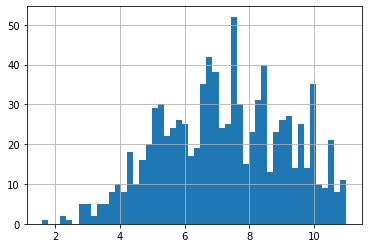

In [80]:
spb_centr_region['last_price'].hist(bins = 50)

Больше всего квартир в центральном районе СПБ за 9 млн. 

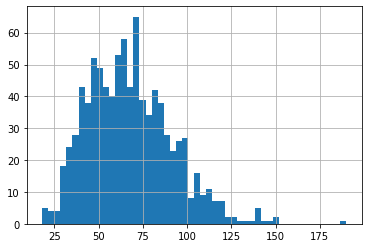

In [81]:
spb_centr_region['total_area'].hist(bins = 50)

В центральном районе СПБ больше всего квартир с общей площадью 60-70 кв.м.

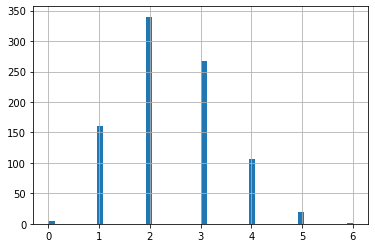

In [82]:
spb_centr_region['rooms'].hist(bins = 50)

В центральном районе СПБ в основном продаются 2-х комнатные квартиры. 

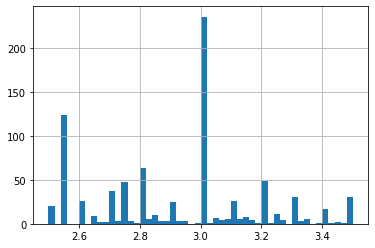

In [83]:
spb_centr_region['ceiling_height'].hist(bins = 50, range = (2.5, 3.5))

В центральном районе СПБ в основном продаются квартиры с высотой потолка 3 м.

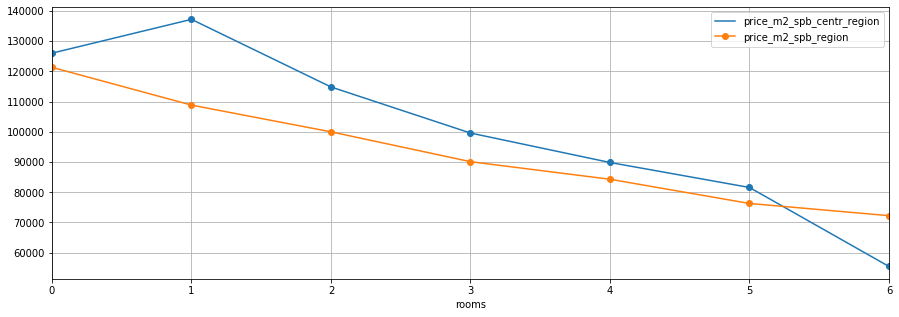

In [84]:
(spb_centr_region
     .groupby('rooms')['price_for_m2'].median()
     .plot(x = 'rooms', y = 'price_for_m2', style='o-',grid=True,figsize=(15,5), legend=True, label = 'price_m2_spb_centr_region')
)

(spb_region
     .groupby('rooms')['price_for_m2'].median()
     .plot(x = 'rooms', y = 'price_for_m2', style='o-',grid=True,figsize=(15,5), legend=True, label = 'price_m2_spb_region')
)
plt.show()

Из графиков видно, что стоимость кв. м. больше у однокомнатных квартир как в центре СПБ, так и во всем городе. С увеличением количества комнат, стоимость кв. м. падает. 

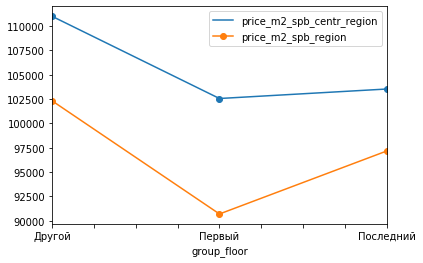

In [85]:
(spb_centr_region
    .groupby('group_floor')['price_for_m2'].median()
    .plot(x = 'group_floor', y = 'price_for_m2', style='o-',legend=True, label = 'price_m2_spb_centr_region')
)

(spb_region
    .groupby('group_floor')['price_for_m2'].median()
    .plot(x = 'group_floor', y = 'price_for_m2', style='o-',legend=True, label = 'price_m2_spb_region')
)

plt.show()

Из анализа графиков видно, квартиры на первом этаже ценятся менее всего, как в центре питера, так и во всем городе. 

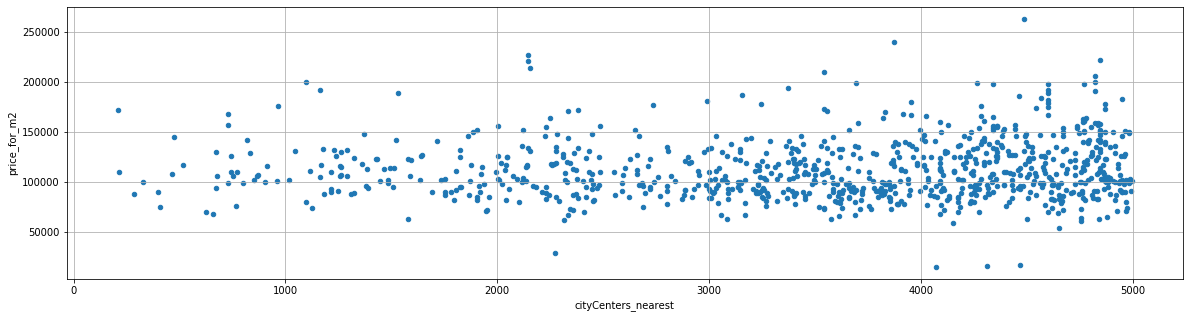

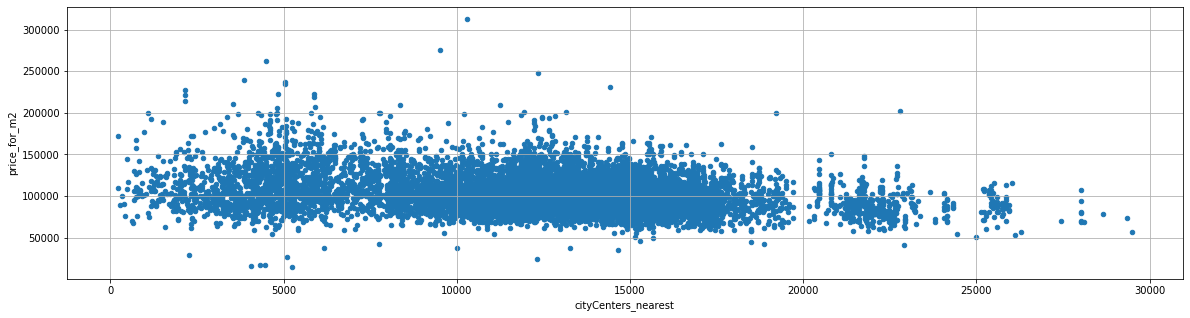

In [86]:
(spb_centr_region
     #.groupby('cityCenters_nearest')['last_price'].median()
     .plot(x = 'cityCenters_nearest', y = 'price_for_m2', grid=True, style='o-', figsize = (20,5), kind='scatter')
)
(spb_region
     #.groupby('cityCenters_nearest')['last_price'].median()
     .plot(x = 'cityCenters_nearest', y = 'price_for_m2', grid=True, style='o-', figsize = (20,5), kind='scatter')
)

plt.show()

Из графиков видно, что больше всего квартир продается на расстоянии более 5 км. от центра. 

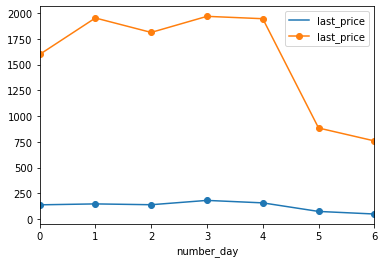

In [87]:
(spb_centr_region
     .groupby('number_day')['last_price'].count()
     .plot(x='number_day',y='last_price',style='o-',legend=True)
)

(spb_region
     .groupby('number_day')['last_price'].count()
     .plot(x='number_day',y='last_price',style='o-',legend=True)
)

plt.show()

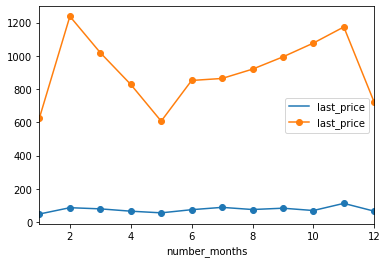

In [88]:
(spb_centr_region
     .groupby('number_months')['last_price'].count()
     .plot(x='number_months',y='last_price',style='o-',legend=True)
)

(spb_region
     .groupby('number_months')['last_price'].count()
     .plot(x='number_months',y='last_price',style='o-',legend=True)
)

plt.show()

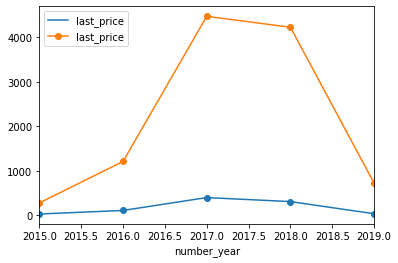

In [89]:
(spb_centr_region
     .groupby('number_year')['last_price'].count()
     .plot(x='number_year',y='last_price',style='o-',legend=True)
)

(spb_region
     .groupby('number_year')['last_price'].count()
     .plot(x='number_year',y='last_price',style='o-',legend=True)
)

plt.show()

На графиках зависимость количества продаж квартир от номера дня недели, месяца и года в центре СПБ и во всем городе. Видно, что статистика носит похожий характер. Падение в выходные дни, месяцы с праздниками и 2019 год. 

## Общий вывод

1.	В Data Frame, представленном на исследование 22 столбца, 23.699 строк. Обнаружены пропуски значений в 11 столбцах.  
2.	В разделе Предобработка данных избавилась от пропусков данных, где это возможно осуществив замену. В важных параметрах, которые в дальнейшем будут иметь значения в расчетах, избавилась от оставшихся пропусков, удалив их.
Привела в соответствие типы данных. 
3. В разделе "Расчеты и добавление результатов" провела расчеты параметров (цена квадратного метра, вариант расположения этажа квартиры, соотношение жилой и общей площади, а также отношение площади кухни к общей, рассчитала: день недели, месяц и год публикации объявления), ввела соответствующие столбцы в DF.  
4. В разделе "Исследовательский анализ данных" провела изучение зависимостей:
- распределение параметров "общая площадь, цена, число комнат, высота потолков". Построила гистограммы для каждого параметра. Выявила характерные особенности каждого параметра: 
- Больше всего квартир продается площадью 40-45 кв. м.
- Больше всего квартир продается по цене 3-5 млн.
- Больше всего продается 1-2 комнатных квартир.
- Больше всего квартир с высотой потолков 2,75 м.
5.	Изучила время продажи квартиры: 
- Больше всего продаж квартир приходится на 46 день.
- Среднее время продажи квартиры 95 дней. 
6. Учла влияние выбросов на значения, посчитав межквартильный размах. 
7. Установла зависимость цена от площади, количества комнат, этажа, удаленности от центра. Постоила графики распределения, расчитала коэффициент корреляции Пирса. Установила, что цена ростет при увеличении площади, количества комнат, падает при удаленности от центра, самые дешевые квартиры на 1 этаже. Установила зависимость количества размещения объявлений от дня недели. 
7. Далее установила самое дорогое жилье в "поселке Лисий Нос", самое дешевое в "поселоке Житково" (по цене за кв. м). 
8. Установила стоимость кв. м. жилья в СПБ от удаленности от центра.
9. Выделила квартиры в центре СПБ и установила их распределения: по стоимости, общей площади, количеству комнат, высоте потолков. 
10. Для сравнения по выделенным квартирам в СПБ и во всем городе постоила зависимости: цены кв. м. от количества комнат, от этажа, количества объявлений от дня недели, а также диаграмму рассеяния распределения цены за кв. м. от удаленности от центра. 

На цену квартиры влияют: общая площадь, удаленность от центра, количество комнат (однако зависимость не сильная). Расположение квартир на первом этаже негативно влияет на цену. Максимальная стоимость квадратного метра у однокомнатных квартир. 
Эта зависимость характерна как для центра СПБ, так и для города в целом. 
Кроме того, расчитала среднюю стоимость квадратного метра и ее зависимость от расстояния от центра. Постоила визуализацию. 



## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод